## Markowitz Portfolio Theory

Get more details of the theory <a href="https://www.math.ust.hk/~maykwok/courses/ma362/07F/markowitz_JF.pdf">here</a>

* Volatility in the data is the risk value

In [8]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# get adjusted closing prices of 5 selected companies with Quandl
quandl.ApiConfig.api_key = 'PASTE YOUR API KEY HERE'
selected = ['CNP', 'F', 'WMT', 'GE', 'TSLA']
data = quandl.get_table('WIKI/PRICES', ticker = selected,
                        qopts = { 'columns': ['date', 'ticker', 'adj_close'] },
                        date = { 'gte': '2014-1-1', 'lte': '2019-1-31' }, paginate=True)
data

,date,ticker,adj_close
None,,,
0,2018-03-27,WMT,86.050000
1,2018-03-26,WMT,87.500000
2,2018-03-23,WMT,85.420000
3,2018-03-22,WMT,87.140000
4,2018-03-21,WMT,88.180000
5,2018-03-20,WMT,87.950000
6,2018-03-19,WMT,87.450000
7,2018-03-16,WMT,89.170000
8,2018-03-15,WMT,87.510000


In [14]:
# reorganise data pulled by setting date as index with
# columns of tickers and their corresponding adjusted prices
clean = data.set_index('date')
table = clean.pivot(columns='ticker')

# calculate daily and annual returns of the stocks
returns_daily = table.pct_change()
returns_annual = returns_daily.mean() * 250

# get daily and covariance of returns of the stock
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 250

In [17]:
print("daily returns : ", returns_daily)
print("returns_annual : ", returns_annual)

daily returns :             adj_close                                        
ticker           CNP         F        GE      TSLA       WMT
date                                                        
2014-01-02       NaN       NaN       NaN       NaN       NaN
2014-01-03 -0.000438  0.004534 -0.000727 -0.003598 -0.003295
2014-01-06  0.001315  0.004513 -0.008006 -0.017117 -0.005594
2014-01-07  0.010508 -0.012837  0.001101  0.016054  0.003069
2014-01-08 -0.010399  0.010403 -0.002931  0.012855 -0.007903
2014-01-09  0.011384  0.019305  0.000368 -0.024788  0.003341
2014-01-10  0.012121  0.014520 -0.009552 -0.012269 -0.000640
2014-01-13 -0.014542  0.002489 -0.008531 -0.043782 -0.007048
2014-01-14  0.008247  0.018001  0.008979  0.157385  0.006065
2014-01-15  0.009901  0.018293  0.013719  0.017734 -0.003848
2014-01-16  0.004263  0.001796 -0.005121  0.041674 -0.011589
2014-01-17 -0.005942 -0.012552 -0.022794 -0.005615 -0.007426
2014-01-21  0.012383 -0.006659 -0.010910  0.039233 -0.004594
2014-01

In [35]:
# empty lists to store returns, volatility and weights of imiginary portfolios
port_returns = []
port_volatility = []
stock_weights = []
sharpe_ratio = []

# set the number of combinations for imaginary portfolios
num_assets = len(selected)
num_portfolios = 50000

# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    
    #volatility means risk in the selected portfolio
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    sharpe = returns / volatility
    sharpe_ratio.append(sharpe)
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility,
             'Sharpe Ratio': sharpe_ratio}

# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(selected):
    portfolio[symbol+' weight'] = [weight[counter] for weight in stock_weights]

# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' weight' for stock in selected]

# reorder dataframe columns
df = df[column_order]

df.head(10)

,Returns,Volatility,Sharpe Ratio,CNP weight,F weight,WMT weight,GE weight,TSLA weight
0,0.041345,0.151280,0.273303,0.211577,0.120574,0.275797,0.182651,0.209401
1,0.097784,0.182787,0.534958,0.255722,0.108881,0.115319,0.333137,0.186941
2,0.060792,0.141441,0.429806,0.354729,0.268422,0.049285,0.087381,0.240182
3,0.059273,0.199092,0.297715,0.023110,0.247931,0.244231,0.356507,0.128222
4,0.031781,0.149530,0.212539,0.350345,0.103158,0.323399,0.137541,0.085556
5,0.102783,0.184119,0.558241,0.255503,0.073381,0.109619,0.341150,0.220348
6,0.049211,0.179986,0.273419,0.170240,0.220416,0.275154,0.283776,0.050414
7,0.004694,0.137168,0.034219,0.188929,0.091225,0.348458,0.032526,0.338862
8,0.052678,0.183933,0.286399,0.112174,0.181087,0.284561,0.310374,0.111804
9,0.011983,0.144287,0.083047,0.175574,0.340832,0.220426,0.052484,0.210685


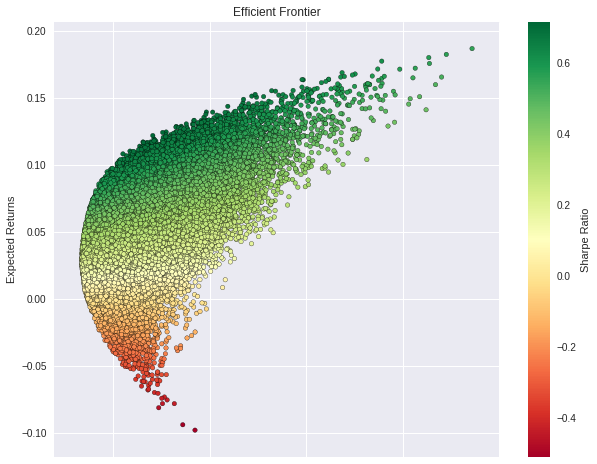

In [37]:
# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

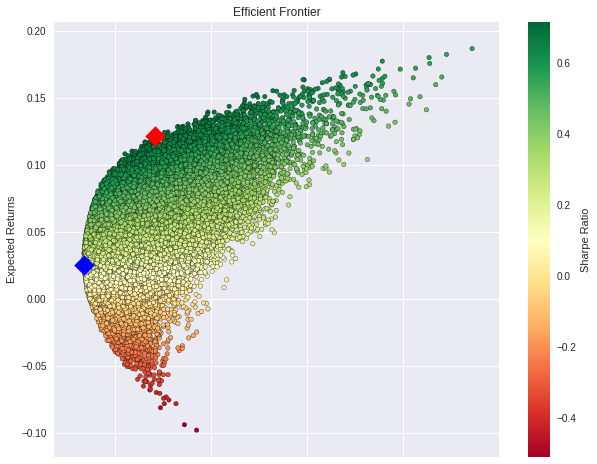

In [38]:
# find min Volatility & max sharpe values in the dataframe (df)
min_volatility = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()

# use the min, max values to locate and create the two special portfolios
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_variance_port = df.loc[df['Volatility'] == min_volatility]

# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], c='red', marker='D', s=200)
plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='blue', marker='D', s=200 )
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

In [39]:
# print the details of the 2 special portfolios
print(min_variance_port.T)
print(sharpe_portfolio.T)

                  1113
Returns       0.024958
Volatility    0.133599
Sharpe Ratio  0.186814
CNP weight    0.297907
F weight      0.135136
WMT weight    0.220609
GE weight     0.010617
TSLA weight   0.335730
                 20379
Returns       0.121840
Volatility    0.170433
Sharpe Ratio  0.714882
CNP weight    0.451255
F weight      0.000376
WMT weight    0.005651
GE weight     0.265653
TSLA weight   0.277065
